**L069_K_means.ipynb**

2024 JUN 07

Tershire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris_dataset.data, columns=columns)
iris_df["target"] = iris_dataset.target

In [4]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# model

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)

# training

In [7]:
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [8]:
print(kmeans.labels_)  # centroid indices: different from target.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
#
kmeans.fit_predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [10]:
#
kmeans.fit_transform(iris_df)  # distance between data sample and its winning centroid (cluster ID).

array([[3.4085739 , 0.14135063, 5.21207751],
       [3.38945069, 0.44763825, 5.24874766],
       [3.55589314, 0.4171091 , 5.40071773],
       [3.41707126, 0.52533799, 5.27868847],
       [3.45635299, 0.18862662, 5.25297554],
       [3.15435825, 0.67703767, 4.88022049],
       [3.50929851, 0.4151867 , 5.33772911],
       [3.33022161, 0.06618157, 5.15411991],
       [3.56375869, 0.80745278, 5.43416525],
       [3.34986209, 0.37627118, 5.20724034],
       [3.31728443, 0.4824728 , 5.07595823],
       [3.30913523, 0.25373214, 5.14316556],
       [3.45450083, 0.50077939, 5.31783339],
       [3.88375797, 0.91322505, 5.73938603],
       [3.62744759, 1.01409073, 5.29083661],
       [3.49141461, 1.20481534, 5.09145873],
       [3.48568157, 0.6542018 , 5.20251401],
       [3.3768589 , 0.1441527 , 5.17789069],
       [3.11723852, 0.82436642, 4.83054365],
       [3.37300697, 0.38933276, 5.13690101],
       [3.0773976 , 0.46344363, 4.88271973],
       [3.3142082 , 0.3286031 , 5.0891406 ],
       [3.

# analysis

In [11]:
iris_df["target"] = iris_dataset.target  # target
iris_df["cluster"] = kmeans.labels_  # cluster ID

display(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [12]:
clustering_result = iris_df.groupby(["target", "cluster"]).count()
print(clustering_result)

                sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  49           49            49           49
       2                   1            1             1            1
2      0                   1            1             1            1
       2                  49           49            49           49


In [13]:
clustering_result = iris_df.groupby(["target", "cluster"])["sepal_length"].count()
print(clustering_result)

target  cluster
0       1          50
1       0          49
        2           1
2       0           1
        2          49
Name: sepal_length, dtype: int64


# dimension reduction

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_dataset.data)

iris_df["pca_feature_1"] = X_pca[:, 0]
iris_df["pca_feature_2"] = X_pca[:, 1]
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_feature_1,pca_feature_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


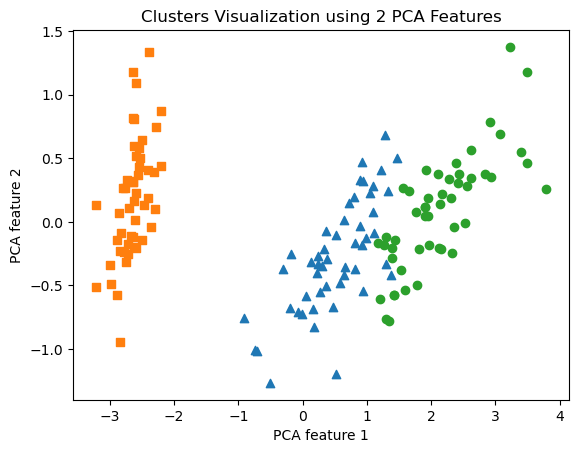

In [18]:
indices_for_each_cluster = []
for i in range(3):
    indices_for_each_cluster.append(iris_df[iris_df["cluster"]==i].index)

markers = ['^', 's', 'o']
for i in range(3):
    indices = indices_for_each_cluster[i]
    plt.scatter(x=iris_df.loc[indices, "pca_feature_1"],
                y=iris_df.loc[indices, "pca_feature_2"],
                marker=markers[i])

plt.xlabel("PCA feature 1")
plt.ylabel("PCA feature 2")
plt.title("Clusters Visualization using 2 PCA Features")
plt.show()

**another method**

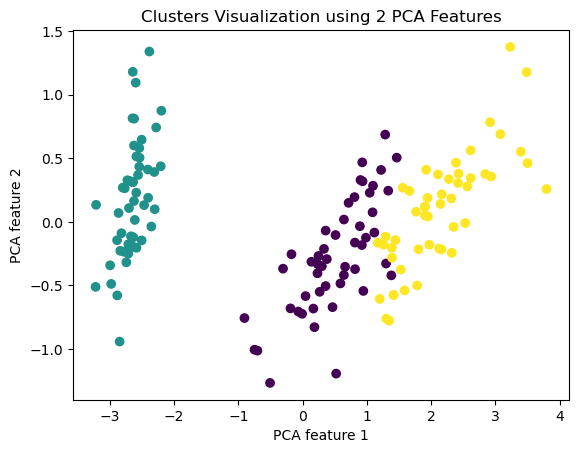

In [20]:
plt.scatter(x=iris_df.loc[:, "pca_feature_1"],
            y=iris_df.loc[:, "pca_feature_2"],
            c=iris_df["cluster"])

plt.xlabel("PCA feature 1")
plt.ylabel("PCA feature 2")
plt.title("Clusters Visualization using 2 PCA Features")
plt.show()